## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- Python modules (non-DL)
- pytorch indexable tensor, and tensor creation (including RNGs - random number generators)
- fastai.datasets

## Check imports

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#export
from exp.nb_00 import *
import operator

def test(a, b, cmp, cname=None):
    if cname is None: 
        cname = cmp.__name__
    assert cmp(a, b), f"{cname}:\n{a}\n{b}"
    print(cmp(a, b), f"{cname}:\n{a}\n{b}")

def test_eq(a, b): 
    test(a, b, operator.eq, '==')

In [4]:
test_eq(TEST,'test')

True ==:
test
test


In [5]:
TEST

'test'

In [ ]:
# To run tests in console:
# ! python run_notebook.py 01_matmul.ipynb

## Get data

In [5]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [7]:
path = datasets.download_data(MNIST_URL, ext='.gz'); 
path

PosixPath('/projects/da_workspace/szspace/.fastai/data/mnist.pkl.gz')

In [8]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [9]:
x_train
x_train.shape

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32)

(50000, 784)

In [10]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
n, c = x_train.shape
n, c
x_train, x_train.shape 
y_train, y_train.shape, y_train.min(), y_train.max()

(50000, 784)

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), torch.Size([50000, 784]))

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]), tensor(0), tensor(9))

In [11]:
assert n == y_train.shape[0] == 50000
test_eq(c, 28*28)
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 9)

True ==:
784
784
tensor(1, dtype=torch.uint8) ==:
0
0
tensor(1, dtype=torch.uint8) ==:
9
9


In [12]:
mpl.rcParams['image.cmap'] = 'gray'

In [13]:
img = x_train[0]

In [16]:
img.shape

torch.Size([784])

In [17]:
img.view(28, 28).type()

img.view(28, 28).shape

'torch.FloatTensor'

torch.Size([28, 28])

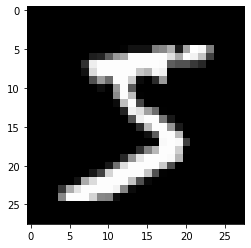

In [18]:
plt.imshow(img.view((28, 28)));

## Initial python model

In [19]:
weights = torch.randn(784,10)

In [20]:
bias = torch.zeros(10)

In [21]:
weights
bias

tensor([[ 0.3206, -0.6260, -0.7780,  ..., -1.5951, -0.0613, -0.0959],
        [ 1.5957,  1.4951, -1.2419,  ...,  1.8279, -0.7244, -1.1845],
        [-1.0073, -0.4250, -0.2213,  ...,  0.2443,  2.5048, -0.9726],
        ...,
        [-0.9941, -0.7719,  0.2223,  ...,  0.2339, -1.2178,  1.5435],
        [-0.4640,  0.2439,  0.6546,  ..., -0.0429, -0.7946,  0.5319],
        [-1.6033,  0.2335,  0.1732,  ...,  0.7699,  0.9772,  1.1963]])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Matrix multiplication

In [25]:
a = tensor([1,2,3])
b = tensor([10, 20, 30])
a*b # elementwise multiply
a @ b # matrix muliply

tensor([10, 40, 90])

tensor(140)

In [26]:
def matmul(a, b):
    ar, ac = a.shape # n_rows * n_cols
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
#                 print(f'i, j ,k are {i}, {j}, {k}')
                c[i, j] += a[i, k] * b[k, j]
    return c

In [28]:
m1 = x_valid[:5]
m2 = weights

In [29]:
m1

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [30]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [31]:
%time t1 = matmul(m1, m2)

CPU times: user 641 ms, sys: 0 ns, total: 641 ms
Wall time: 638 ms


In [32]:
t1.shape
t1

torch.Size([5, 10])

tensor([[  2.5458,   4.7103,   4.3637,   4.3820,   4.4149,   5.7340,   8.9506,
           5.3298,   0.4772,   2.7591],
        [ -3.2942,   2.9409,   1.7065,   2.5310,   5.0228, -10.0460,   0.8608,
          12.5203,   7.7429,   1.4235],
        [ 13.6558,   7.3043, -11.1759,   7.3484,   0.8227,   9.2004,   3.9072,
          -1.5152,  17.7126,  -1.0965],
        [ -2.0913,   2.6057,  -7.4694,  -2.6287,  13.6295,   0.4524,  13.8353,
         -11.0308,  -8.9713,  -3.6588],
        [ 10.9263,   0.0879,  -6.8498,   3.5482,  -6.1171,  -1.5589,  -4.4202,
          22.7054,  -2.6075,  -7.5529]])

This is kinda slow - what if we could speed it up by 50,000 times? Let's try!

In [33]:
len(x_train)

50000

#### Elementwise ops

Operators (+,-,\*,/,>,<,==) are usually element-wise.

Examples of element-wise operations:

In [34]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [36]:
a + b

tensor([12., 14.,  3.])

In [37]:
(a < b).float().mean()

tensor(0.6667)

In [7]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]])
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste.

In [48]:
r, c = m.shape
v = 0
r, c
for i in range(r):
    for j in range(c):
        v += m[i, j]*m[i, j]
v.sqrt()

(3, 3)

tensor(16.8819)

In [49]:
(m*m).sum().sqrt()

tensor(16.8819)

In [40]:
# element wise multiplcation
m * m
# matrix multiplication
m @ m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

tensor([[ 30.,  36.,  42.],
        [ 66.,  81.,  96.],
        [102., 126., 150.]])

#### Elementwise matmul

In [51]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [69]:
(m[0,:])*m

tensor([[ 1.,  4.,  9.],
        [ 4., 10., 18.],
        [ 7., 16., 27.]])

In [20]:
# broadcasting, 
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]])
m
m[0,:]
m[:, 0]
(m[0,:] * m[:,0])
(m[0,:] * m[:,0]).sum()
(m[0,:]*m)
(m[0,:][:, None].expand_as(m))*m
(m[0,:][:, None]*m)#.sum(dim=0)
(m[0,:][:, None]*m).sum(dim=0)
# (m[1,:][:, None]*m).sum(dim=0)
# (m[2,:][:, None]*m).sum(dim=0)
m@m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

tensor([1., 2., 3.])

tensor([1., 4., 7.])

tensor([ 1.,  8., 21.])

tensor(30.)

tensor([[ 1.,  4.,  9.],
        [ 4., 10., 18.],
        [ 7., 16., 27.]])

tensor([[ 1.,  2.,  3.],
        [ 8., 10., 12.],
        [21., 24., 27.]])

tensor([[ 1.,  2.,  3.],
        [ 8., 10., 12.],
        [21., 24., 27.]])

tensor([30., 36., 42.])

tensor([[ 30.,  36.,  42.],
        [ 66.,  81.,  96.],
        [102., 126., 150.]])

In [51]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [49]:
# this takes a lot longer, 3 loops
%timeit matmul(m1, m2)

1.76 s ± 209 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%timeit -n 10 _ = matmul(m1, m2)

5.15 ms ± 545 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
890.1/5

178.02

In [53]:
#export
def near(a, b): 
    return torch.allclose(a, b, rtol=1e-3, atol=1e-5)

def test_near(a, b): 
    test(a, b, near)

In [54]:
t1

tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3867,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.2745, -10.1863,   7.7702, -15.3446,   2.7816,
          -1.2893,  -4.8088,  25.3713],
        [  3.6309,  10.6661,  -0.6334,  -8.6113,   3.3079,   0.8717,  -3.5156,
           0.5087, -18.0289,  13.2890]])

In [55]:
matmul(m1, m2)

tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3868,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.2745, -10.1863,   7.7702, -15.3446,   2.7816,
          -1.2893,  -4.8088,  25.3713],
        [  3.6309,  10.6661,  -0.6334,  -8.6113,   3.3079,   0.8717,  -3.5156,
           0.5087, -18.0289,  13.2890]])

In [56]:
test_near(t1, matmul(m1, m2))

True near:
tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3867,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.2745, -10.1863,   7.7702, -15.3446,   2.7816,
          -1.2893,  -4.8088,  25.3713],
        [  3.6309,  10.6661,  -0.6334,  -8.6113,   3.3079,   0.8717,  -3.5156,
           0.5087, -18.0289,  13.2890]])
tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3868,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.274

### Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

#### Broadcasting with a scalar to array

In [60]:
a

tensor([10.,  6., -4.])

In [61]:
a > 0

tensor([1, 1, 0], dtype=torch.uint8)

How are we able to do a > 0?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [62]:
a + 1

tensor([11.,  7., -3.])

In [63]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [64]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

#### Broadcasting a vector to a matrix

We can also broadcast a vector to a matrix:

In [22]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [23]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [24]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [25]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [26]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [27]:
t = c.expand_as(m)

In [28]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [29]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [30]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [31]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [32]:
c
c.unsqueeze(0)
c[None, :]

tensor([10., 20., 30.])

tensor([[10., 20., 30.]])

tensor([[10., 20., 30.]])

In [33]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [34]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [35]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [36]:
c.shape, c.unsqueeze(0).shape,c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [37]:
c.shape, c[None].shape,c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [38]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [39]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [40]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [41]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

#### Matmul with broadcasting

In [116]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i]   = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [117]:
%timeit -n 10 _=matmul(m1, m2)

419 µs ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [115]:
a = tensor([[1,2,3], [4,5,6], [7,8,9]])
b = tensor([[1,2], [3,4], [5,6]])
# element-wise matmul
s = (a[1,:] * b[:,1]).sum()
x = 0
for k in range(3):
    x += a[1, k] * b[k, 1]
x
assert x == s
# broadcasting
ci = (a[0,:].unsqueeze(-1) * b).sum(dim=0)
ci
js = torch.zeros(2)
for j in range(2):
    jk = (a[0,:] * b[:,j]).sum()
    js[j] = jk
js


tensor(64)

tensor([22, 28])

tensor([22., 28.])

In [ ]:
885000/277

3194.945848375451

In [118]:
test_near(t1, matmul(m1, m2))

True near:
tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3867,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.2745, -10.1863,   7.7702, -15.3446,   2.7816,
          -1.2893,  -4.8088,  25.3713],
        [  3.6309,  10.6661,  -0.6334,  -8.6113,   3.3079,   0.8717,  -3.5156,
           0.5087, -18.0289,  13.2890]])
tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3867,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.274

#### Broadcasting Rules

In [ ]:
c[None,:]

tensor([[10., 20., 30.]])

In [ ]:
c[None,:].shape

torch.Size([1, 3])

In [ ]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [ ]:
c[:,None].shape

torch.Size([3, 1])

In [ ]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [119]:
c[None] > c[:,None]

tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

### Einstein summation

Einstein summation (`einsum`) is a compact representation for combining products and sums in a general way. From the numpy docs:

"The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so `np.einsum('i,i', a, b)` is equivalent to `np.inner(a,b)`. If a label appears only once, it is not summed, so `np.einsum('i', a)` produces a view of a with no changes."

In [120]:
np.inner?

In [121]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
def matmul(a, b): 
    return torch.einsum('ik,kj->ij', a, b)

In [125]:
%timeit -n 10 _= matmul(m1, m2)

123 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [126]:
1.7 * 1000 * 1000/123

13821.138211382115

In [ ]:
885000/55

16090.90909090909

In [127]:
test_near(t1, matmul(m1, m2))

True near:
tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3867,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.2745, -10.1863,   7.7702, -15.3446,   2.7816,
          -1.2893,  -4.8088,  25.3713],
        [  3.6309,  10.6661,  -0.6334,  -8.6113,   3.3079,   0.8717,  -3.5156,
           0.5087, -18.0289,  13.2890]])
tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3867,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.274

### pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

In [128]:
%timeit -n 10 t2 = m1.matmul(m2)

19.5 µs ± 5.85 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# time comparison vs pure python:
885000/18

49166.666666666664

In [129]:
t2 = m1@m2

In [130]:
test_near(t1, t2)

True near:
tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3867,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.2745, -10.1863,   7.7702, -15.3446,   2.7816,
          -1.2893,  -4.8088,  25.3713],
        [  3.6309,  10.6661,  -0.6334,  -8.6113,   3.3079,   0.8717,  -3.5156,
           0.5087, -18.0289,  13.2890]])
tensor([[  3.4533,   6.2644,  -0.9424,  -5.5424,   6.2584,  -8.6125,   1.5388,
         -23.9396,  -8.3728,  12.1934],
        [ -0.9682,   7.4664,   3.3357,  -8.8878,   7.3867,  -2.9449,  10.1808,
         -21.0023,   1.8971,   5.1162],
        [  4.0786,  12.3053,  -4.9660,  -7.3677,  -1.2334,   4.5581,  -3.6271,
           2.8502,  -9.0452,  21.4041],
        [ 22.6050,   8.8999,  -4.274

In [131]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
m3,m4  = m1.cuda(),m2.cuda()

In [ ]:
t3 = m3.matmul(m4)

In [ ]:
%timeit -n 10 t3 = m3.matmul(m4)

23.9 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Export

In [ ]:
!python notebook2script.py 01_matmul.ipynb

Traceback (most recent call last):
  File "notebook2script.py", line 3, in <module>
    import json,fire,re
ModuleNotFoundError: No module named 'fire'
